In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

TA35 = pd.read_csv(r'C:\Users\User\Desktop\ta35.txt',index_col=0, parse_dates=True)

In [2]:
TA35['ma'] = TA35['Close'].rolling(window=20).mean().round(2)
TA35['std'] = TA35['Close'].rolling(window=20).std().round(2)
TA35['lowerBB'] = TA35['ma'] - (TA35['std'] * 2).round(2)
TA35['upperBB'] = TA35['ma'] + (TA35['std'] * 2).round(2)
TA35 = TA35.dropna()

In [3]:
def figB (df, stime, etime):
    
    #  style
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(111)
    
    prices = df.loc[stime:etime]['Close']
    Ubb = df.loc[stime:etime]['upperBB']
    Dbb = df.loc[stime:etime]['lowerBB']
    ma = df.loc[stime:etime]['ma']
    
    ax.fill_between(df.loc[stime:etime].index, Ubb, Dbb, color='grey')

    # Plot Closing Price and Moving Averages
    ax.plot(df.loc[stime:etime].index, prices, color='blue', lw=2)
    ax.plot(df.loc[stime:etime].index, ma , color='black', lw=2)

    # Title & Show the Image
    ax.set_title('20 Day Bollinger Band For TA35')
    ax.set_xlabel('Date (Year/Month)')
    ax.set_ylabel('Price')
    ax.legend()
    plt.show()

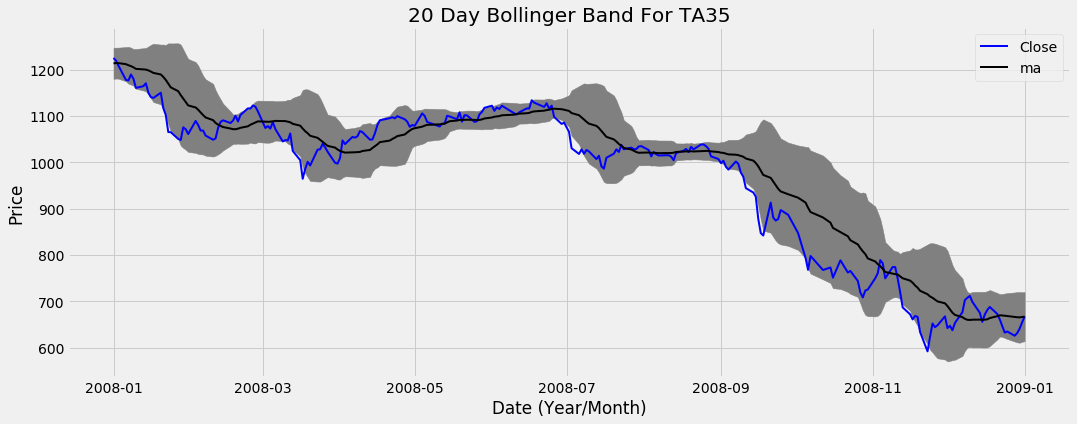

In [4]:
figB(TA35,'2008-01-01','2009-01-01')

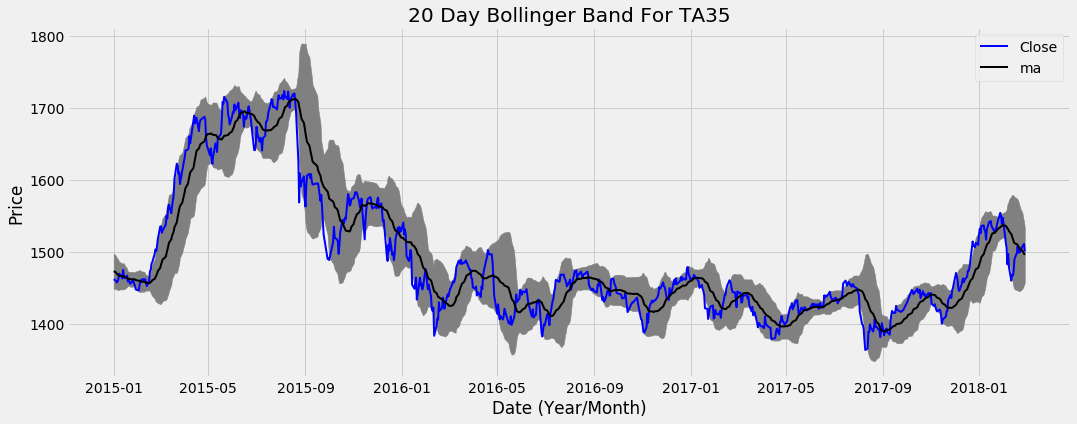

In [5]:
figB(TA35,'2015-01-01','2018-03-01')

In [6]:
TA35['ma'] = TA35['Close'].rolling(window=80).mean().round(2)
TA35['std'] = TA35['Close'].rolling(window=80).std().round(2)
TA35 = TA35.dropna()

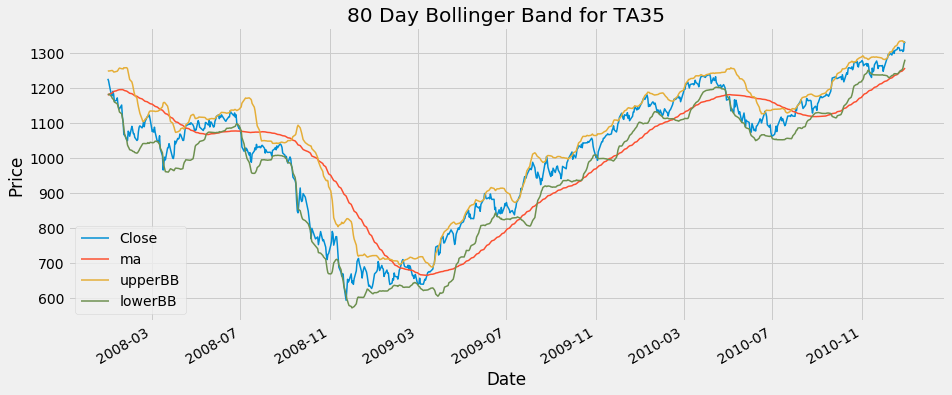

In [7]:
# 80 Day Bollinger Band for TA35
TA35.loc['2008':'2010'][['Close', 'ma', 'upperBB', 'lowerBB']].plot(figsize=(14,6), lw=1.5)
plt.title('80 Day Bollinger Band for TA35')
plt.ylabel('Price')
plt.show()

In [8]:
# Trade Entry
TA35['long_entry'] = TA35.High > TA35.upperBB.shift(1)
TA35['short_entry'] = TA35.Low < TA35.lowerBB.shift(1)

In [9]:
# Trade Exit
TA35['long_exit'] = TA35.Low < TA35.ma.shift(1)
TA35['short_exit'] = TA35.High > TA35.ma.shift(1)

In [10]:
TA35['Position_Long'] = np.nan
TA35.loc[TA35.long_entry,'Position_Long'] = 1
TA35.loc[TA35.long_exit,'Position_Long'] = 0

In [11]:
TA35['Position_Short'] = np.nan
TA35.loc[TA35.short_entry,'Position_Short'] = -1
TA35.loc[TA35.short_exit,'Position_Short'] = 0

In [12]:
TA35 = TA35.fillna(method='ffill')
TA35['Signal'] = TA35.Position_Long + TA35.Position_Short
TA35['daily_returns'] = np.log(TA35.Close/TA35.Close.shift(1))
TA35['daily_strategy_returns'] = TA35['daily_returns'] * TA35.Signal.shift(1)

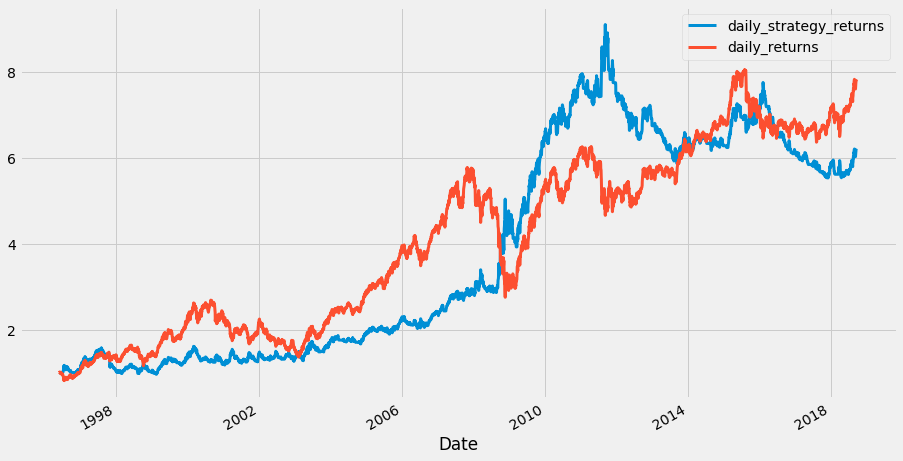

In [14]:
TA35[['daily_strategy_returns','daily_returns']].dropna().cumsum().apply(np.exp).plot(figsize=(14,8), lw=3);